### 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

#### 1. Gropuing
- Grouping은 유사한 패턴이나 특징을 공유하는 데이터 포인트들을 하나로 묶는 과정을 의미한다. 이때, 데이터 포인트별 묶음의 정답은 없으며, 기계 스스로 데이터 특성에 대한 학습을 통해 묶음을 구성하게 된다. Gropuing 결과는 데이터의 구조와 패턴 활용에 대한 인사이트를 제공한다. 

#### 2. Gropuing의 수단
##### 1) Clustering (군집화)
- 군집화는 유사한 특징을 갖는 데이터들을 하나의 클러스터로 분류하는 방법이다. 군집을 형성하는 기준과 방식에는 여러 가지가 있지만, 다음 두 가지가 대표적으로 사용되는 clustering 모델이다. <br><br/>
- K-means : 각각의 데이터 포인트를 설정된 클러스터의 중심 중 가장 가까운 것과 묶어 나가며 k개의 클러스터를 만드는 모델이다. 데이터 포인트 할당을 통해 클러스터가 형성된 이후에는 각 클러스터의 평균 위치를 계산해 새로운 중심점을 생성해내며, 새롭게 생성된 중심에 대해 동일한 클러스터링 과정이 반복된다. 더이상 새롭게 생성되는 중심점이 없을 때 알고리즘은 종료된다. 더불어, 모델에서 사용하는 k는 하이퍼 파라미터로, elbow method, shillouette score 등을 이용해 사람이 직접 값을 지정해야 한다.  <br><br/>
- DBSCAN : K-means가 데이터 포인트 간의 거리를 기반으로 동작하는 모델이었다면, DBSCAN은 밀도를 기반으로 데이터 포인트를 클러스터링한다. 랜덤하게 설정된 초기 포인트의 n 반경 내에 지정된 최소 이웃 수 이상의 포인트가 존재하면 해당 포인트를 코어 포인트로 설정하고, 코어 포인트로부터 반경 n 안에 존재하는 다른 포인트들을 경계 포인트, n 반경 내에 최소 이웃 수 미만의 이웃을 갖는 포인트는 아웃라이어로 간주한다. 이 때, n 반경 이내의 포인트들을 하나로 묶어 클러스터를 생성한다. 이 과정은 모든 포인트에 대해 반복된다. K-means에서의 k와 마찬가지로, DBSCAN은 반경과 최소 이웃 수를 하이퍼 파라미터로 지정해 입력해야 한다.

##### 2) Dimensionality Reudction (차원 축소)
- 차원 축소는 데이터의 분산을 최대화하는 주성분을 찾아 차원을 축소하는 방법이다. 차원 축소는 데이터 내의 유사한 정보들이 서로 더 가깝게 위치하게 해 자연스러운 그룹이나 클러스터를 생성할 수 있게 한다는 점에서 GROUPING의 한 방법론으로 취급된다. <br><br/>
- PCA : PCA는 데이터의 주요 특성을 추출해 차원을 축소하는 기법이다. 스케일링 된 데이터에 대해 적용되며, 표준화된 데이터의 고유값과 고유벡터를 계산하고 크기 순으로 정렬된 고유값에 대응하는 고유 벡터들을 선택해 데이터를 새로운 차원으로 변환하는 과정을 거친다. 이때, 각 주성분은 새로운 축의 역할을 하며, 원래 데이터는 분산을 최대한 보존하며 새롭게 만들어진 축에 투영된다. 

### 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


In [201]:
import numpy as np
import pandas as pd

import missingno

df = pd.read_csv('diabetes (1).csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


* Target variable : Outcome

* 설명변수
  - Pregnancies : 임신 횟수
  - Glucose : 혈장 포도당 농도
  - Blood Pressure : 혈압
  - Skin Thickness : 피부 주름 두께 (mm)
  - Insulin : 2시간 혈청 인슐린
  - BMI : 체질량 지수
  - Diabetes Pedigree Function : 당뇨병 혈통 기능
  - Age : 나이

<Axes: >

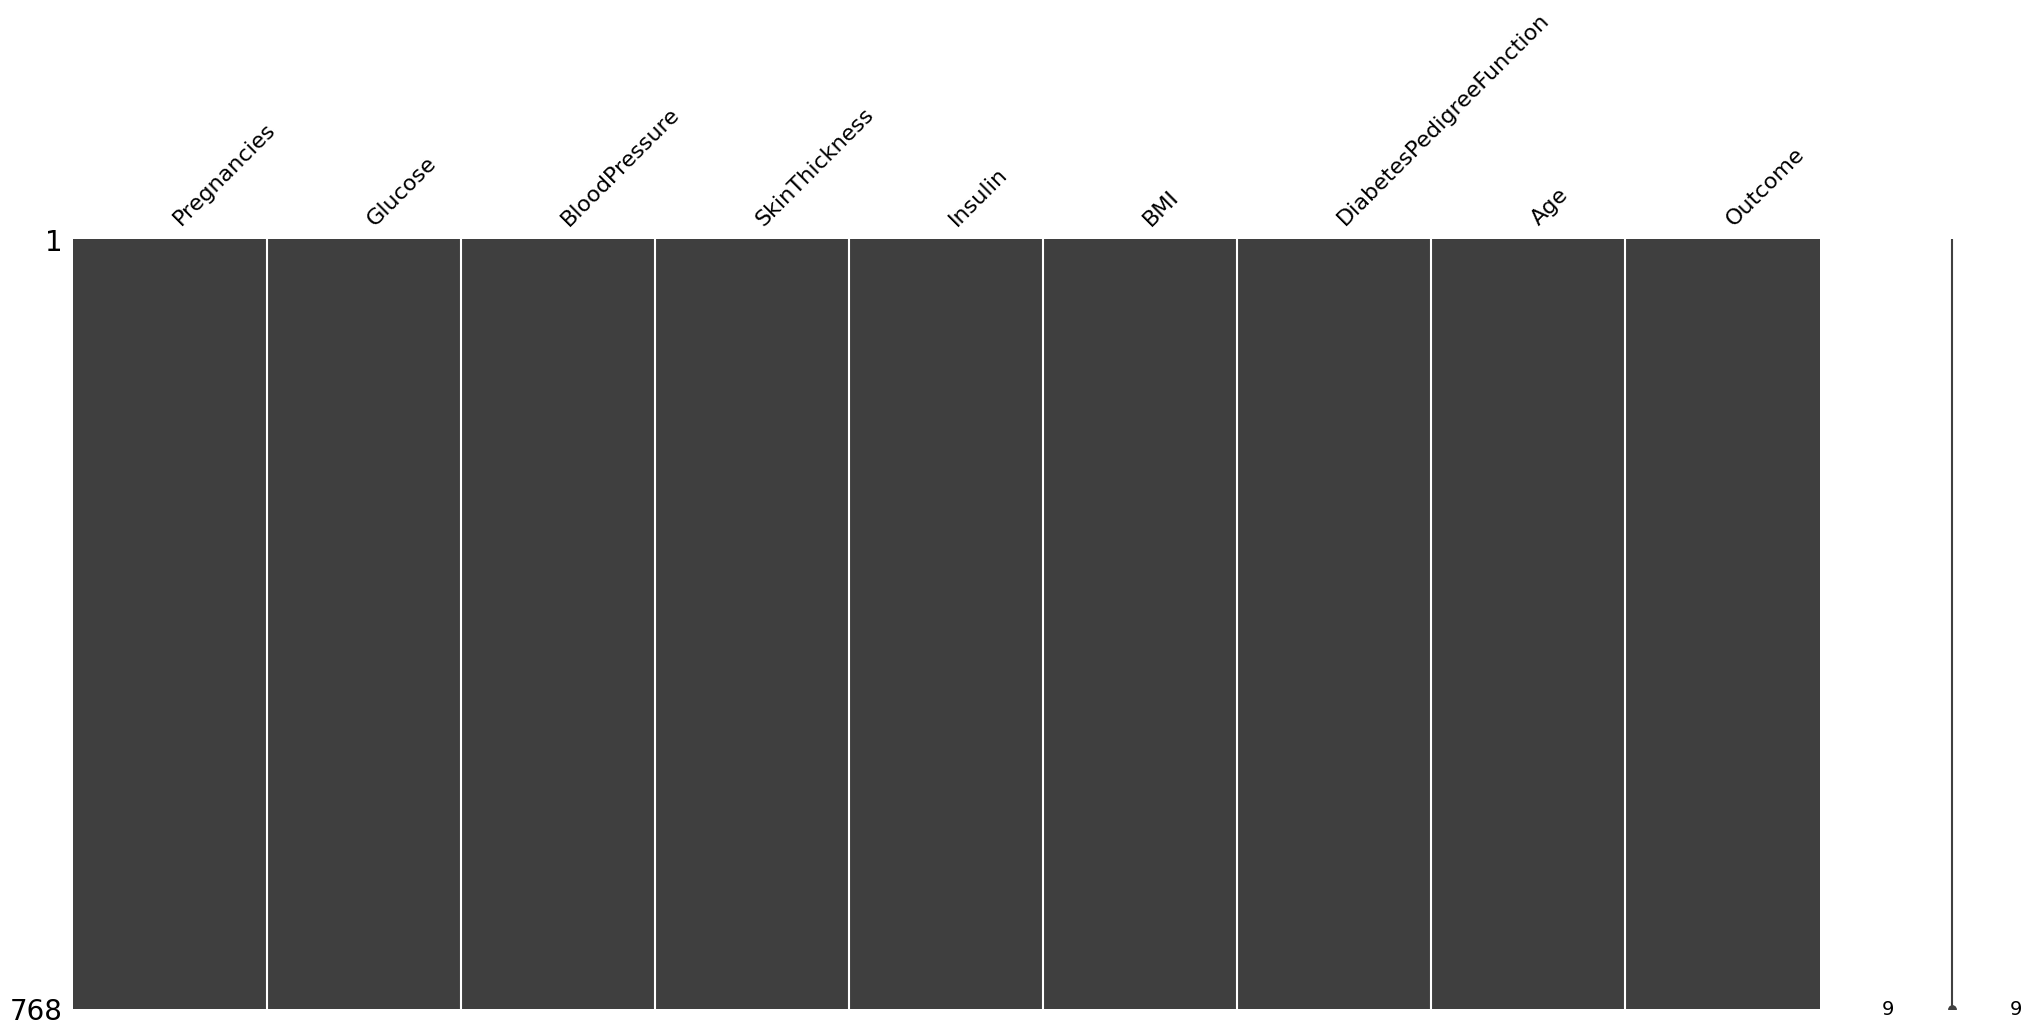

In [3]:
missingno.matrix(df)

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- missingno나 isnull()을 통해 확인해보면 결측치가 없는 것으로 나옴.
- 단, describe()를 통해 통계 요약값을 확인해봤을 때, Glucose, BloodPressure, SkinThickness, Insulin 컬럼의 최소값이 0임
- 이 컬럼들은 값이 0일 확률이 적기에, 결측치를 0으로 채워 넣은 데이터라고 판단 후 추가적인 결측치 처리 작업을 진행함

In [11]:
null = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
null.isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

- 결측치를 가진 것으로 의심되는 컬럼들에 대해 0 값을 NAN으로 바꾸고  isnull()을 실행한 결과, SkinThickness와 Insulin 컬럼에서 결측치가 다수 확인됨
- 전체 768개 데이터 중 Glucose, BMI의 결측치는 0.015 정도의 비율을 차지하고 있고, 0값을 갖는 것도 가능은 하기에 두 컬럼에 대한 결측치는 별도의 처리 없이 두기로 결정함
- 따라서, BloodPressure, SkinThickness, Insulin 컬럼에 대한 처리를 진행

- 결측치를 평균, 중앙값 중 어떤 것으로 채우는 것이 적합할지 판단하기 전에 이상치 처리 먼저 진행

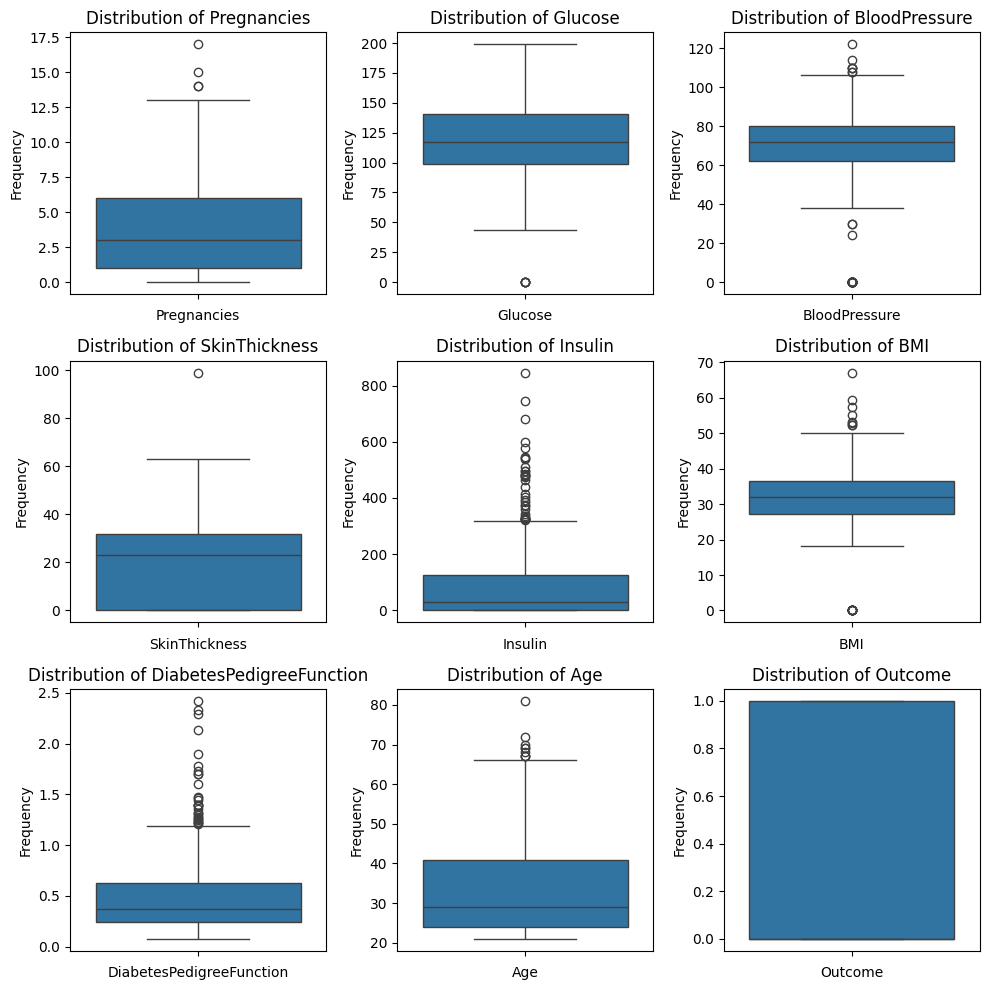

In [52]:
### 이상치 처리 ###
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.columns.tolist()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i, column in enumerate(columns):
    sns.boxplot(df[column], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'Distribution of {column}')
    axes[i//3, i%3].set_xlabel(column)
    axes[i//3, i%3].set_ylabel('Frequency')
    axes[i//3, i%3].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

- 이상치가 과도하게 많은 Insulin, DiabetesPedigreeFunction에 대한 처리 진행

In [49]:
# insulin의 upper fence 계산
Q1, Q2, Q3 = np.percentile(df["Insulin"], [25, 50, 75])
IQR = Q3 - Q1

Q3 + IQR*1.5

318.125

<Axes: xlabel='Insulin', ylabel='Count'>

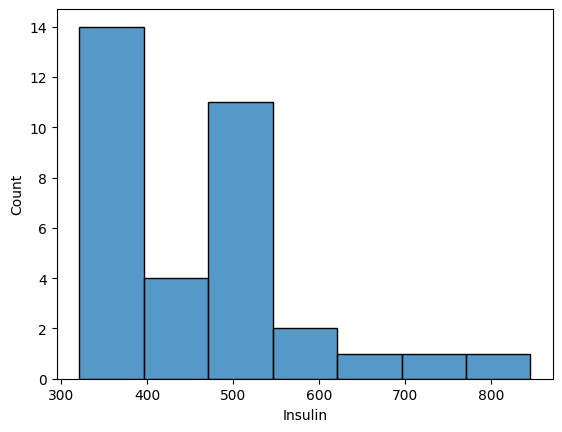

In [58]:
sns.histplot(df[df['Insulin']>318.125], x='Insulin')

In [202]:
# 550 이상인 값을 가진 row (5개)는 삭제, 나머지는 일단 유지
data = df.copy()
data = data[data['Insulin']< 550]

In [70]:
# DiabetesPedigreeFUnction의 upper fence 계산
Q1, Q2, Q3 = np.percentile(df["DiabetesPedigreeFunction"], [25, 50, 75])
IQR = Q3 - Q1

Q3 + IQR*1.5

1.2

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

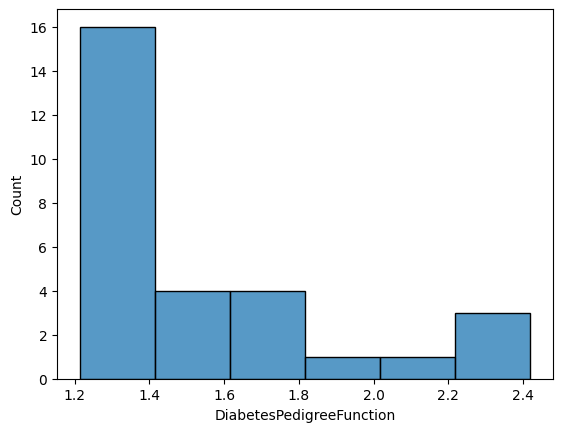

In [79]:
sns.histplot(df[df['DiabetesPedigreeFunction']>=1.2], x='DiabetesPedigreeFunction')

In [203]:
# 범위를 벗어나는 29개의 데이터 중 1.5 이상의 값을 갖는 10개의 데이터만 삭제
len(data[data['DiabetesPedigreeFunction']>=1.5])

data = data[data['DiabetesPedigreeFunction']<1.5]
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Text(0.5, 1.0, 'Correlation Heatmap')

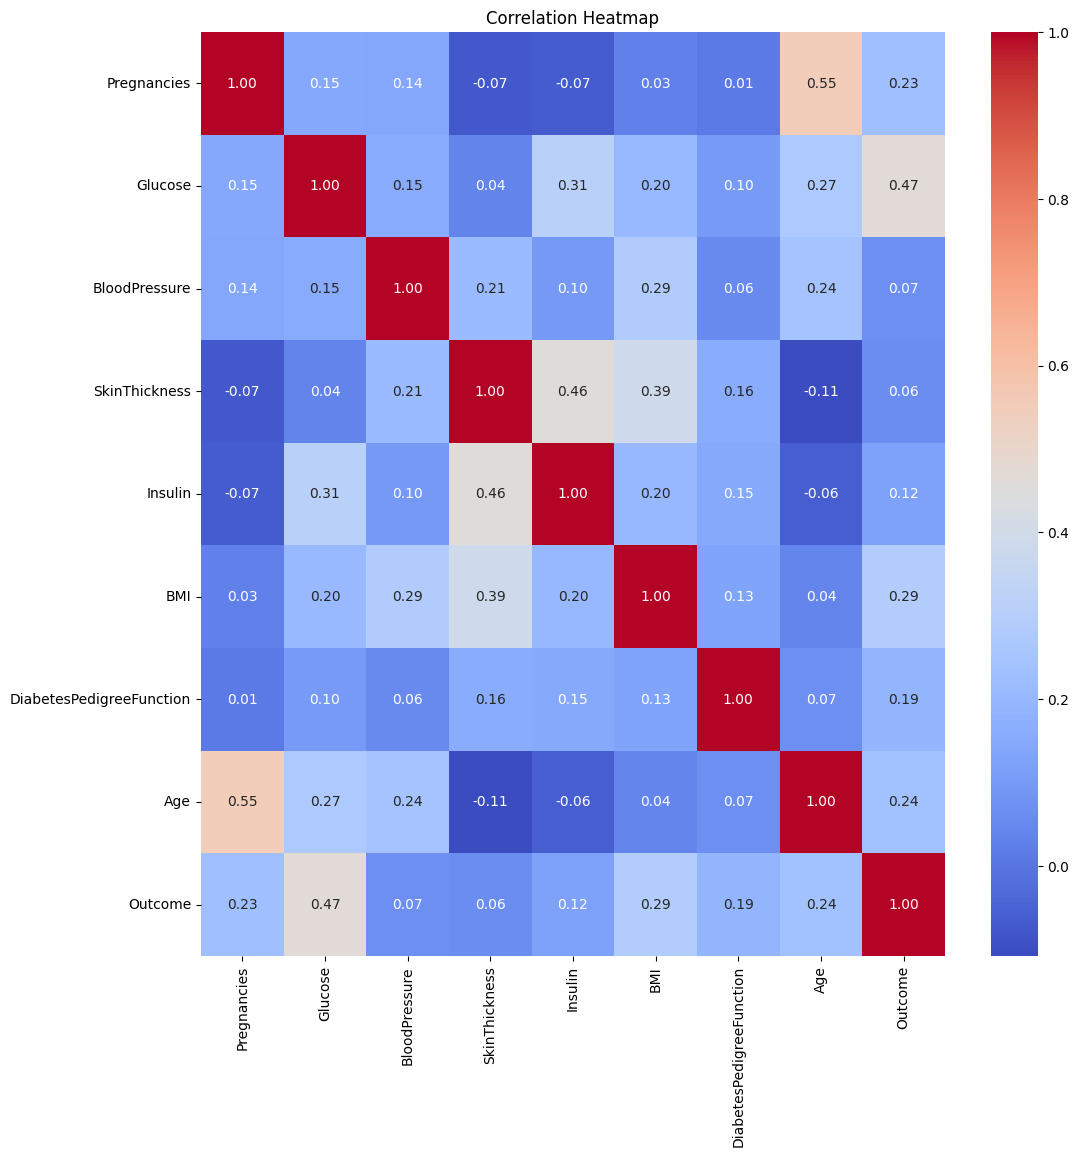

In [88]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True,fmt = '.2f', cmap = 'coolwarm' )
plt.title('Correlation Heatmap')

- SkinThickness-Insulin, SkinThickness-BMI의 상관계수가 비교적 높은 편.
  - Insulin도 결측치를 채워야 하는 컬럼이니 BMI값을 기준으로 SkinThickness를 추정해 채워보자. -> 회귀 모형 추정값으로 채우기

- Insulin과 BloodPressure은 상관계수가 높은 컬럼을 찾을 수 없음 -> 중앙값이나 평균값을 활용해 결측치 메우기
  - Insulin과 SkinThickness의 상관계수가 큰 이유는 두 컬럼 모두 결측치가 0으로 채워진 행이 다수 존재하기 때문이라고 추론
  - 이 때, 두 컬럼 모두 IQR에서 upper fence를 벗어나는 이상치를 가지고 있으니, 아웃라이어의 영향을 덜 받는 중간값으로 채우기

In [204]:
# BMI 값을 이용해 선형 회귀 모델로 SkinThickness 결측치 채우기

# 1. SkinThickness 컬럼 내의 0 값을 NAN으로 변환
data['SkinThickness'].replace(0,np.nan, inplace=True)

In [205]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,0,33.6,0.627,50,1
1,1,85,66,29.0,0,26.6,0.351,31,0
2,8,183,64,NaN,0,23.3,0.672,32,1
3,1,89,66,23.0,94,28.1,0.167,21,0
5,5,116,74,NaN,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0
764,2,122,70,27.0,0,36.8,0.340,27,0
765,5,121,72,23.0,112,26.2,0.245,30,0
766,1,126,60,NaN,0,30.1,0.349,47,1


In [206]:
from sklearn import linear_model

# 선형 회귀 모델 적합하고 추정값으로 결측치 채우기

linreg= linear_model.LinearRegression()

X = data.dropna(axis=0)['BMI'].to_numpy().reshape(-1,1)
y = data.dropna(axis=0)['SkinThickness'].to_numpy()

lin_reg_model = linreg.fit(X,y)

pred = lin_reg_model.predict(df.loc[:, 'BMI'].to_numpy().reshape(-1,1))
data['SkinThickness'].fillna(pd.Series(pred.flatten()),inplace = True)

In [207]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,3.885942,120.377984,69.112732,28.282101,75.213528,31.931432,0.451739,33.269231,0.346154
std,3.374420,31.683219,19.455654,9.976399,103.353547,7.723097,0.284323,11.768706,0.476059
min,0.000000,0.000000,0.000000,-2.085044,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.500000,21.714008,0.000000,27.300000,0.240000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,28.000000,23.000000,32.000000,0.365000,29.000000,0.000000
75%,6.000000,139.750000,80.000000,34.528881,125.000000,36.475000,0.606500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,545.000000,67.100000,1.476000,81.000000,1.000000


In [236]:
data = data[data['SkinThickness']>0] #BMI가 0이라 선형회귀에서 음수값 나온 것들 처리

In [254]:
new = data.copy()
new['Insulin'] = new['Insulin'].replace(0,np.nan)

new.groupby(['Outcome'])[['Insulin','BloodPressure']].agg(['mean','median'])

Insulin        BloodPressure       
               mean median          mean median
Outcome                                        
0        125.455598  100.0     68.967078   70.0
1        195.306452  167.5     71.100386   74.0

In [255]:
new['Insulin'] = new['Insulin'].replace(np.nan,0)

In [293]:
# Insulin, BloodPressure - 중앙값 대체
new = data.copy()

new.loc[(new['Outcome']==0) & (new['Insulin']==0), 'Insulin'] = 100
new.loc[(new['Outcome']==1) & (new['Insulin']==0), 'Insulin'] = 167
new.loc[(new['Outcome']==0) & (new['BloodPressure']==0), 'BloodPressure'] = 70
new.loc[(new['Outcome']==1) & (new['BloodPressure']==0), 'BloodPressure'] = 74


new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,167,33.6,0.627,50,1
1,1,85,66,29.000000,100,26.6,0.351,31,0
2,8,183,64,20.073513,167,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
5,5,116,74,22.260839,100,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,100,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,26.540389,167,30.1,0.349,47,1


In [294]:
# train, test 데이터 나누기

# 1. target, 나머지 데이터 분리하기
x = new.iloc[:,:-1]
y = new.iloc[:,-1]

In [295]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y)

In [296]:
# 2. 분류 성능 향상을 위한 스케일링 -> 안 했을 때 정확도가 더 괜찮다.

X_train = StandardScaler().fit_transform(X_train)

X_test = StandardScaler().fit_transform(X_test)


- 모델별 Parameter Tuning

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [297]:
max_depth = [2,3,5,10,20]
min_samples_leaf = [5,10,20,50]
criterion = ['gini','entropy']

hyperparams = {
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}

gd=GridSearchCV(
    estimator = DecisionTreeClassifier(random_state=1),
    param_grid = hyperparams,
    verbose=True,
    cv=5,
    scoring = "accuracy",
    n_jobs=-1
)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
0.8675457875457877
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}


In [298]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_depth =5, min_samples_leaf=20)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [299]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571
